## Clustering Mall customers by KMeans

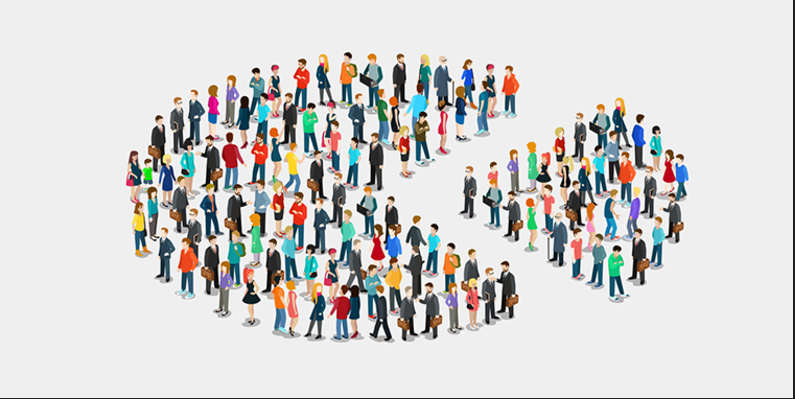

## About This Dataset :


##### This is Mall Customer Dataset. This dataset is collection of financial records and assosiated Information.It is Unsuperwised  dataset means there is no dependent variable 
##### This Dataset contains features like CustomerID , Gender , Age , Annual Income(k(dollers)) and spending Score(1-100)


## Aim of the model :

###### We want to make clusters and segregate customers into that clusters on basis of annual income and spending score . means we want to determine which perticular customer belongs to which cluster on basis and annual income and spending score

## Brief Overview About Dataset :

##### 1.CustomerID : It just id of customer and it shold be unique to every customer
##### 2.Gender : It gender of customer
##### 3.Age : Age of customer
##### 4.Annual Income : Its Annual Income of customer and it is in doller value and it is in thousand
##### 5.Spending Score : Spending Score is the credit card score.its range is between 1 - 100 . means who use very frequent then it should be near about 100 and who use very rear of less frequent then its near about 1.

### Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

### Import the Dataset

In [2]:
df = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\Mall_Customers.csv')

In [3]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


##### shape

In [4]:
df.shape

(200, 5)

#### size

In [5]:
df.size

1000

#### Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Feature Transformation

##### 1.Handling Missing Values

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Boxplot

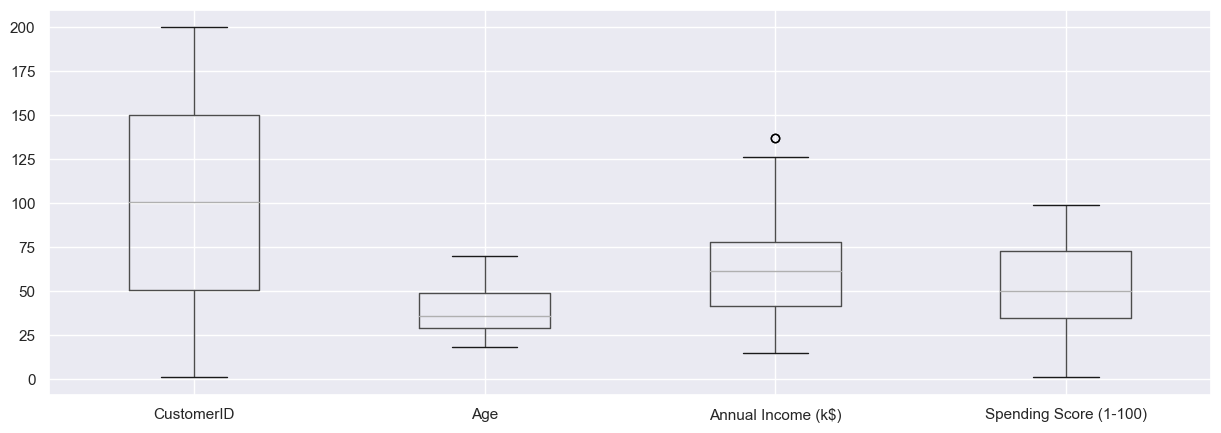

In [8]:
plt.figure(figsize = (15 , 5))
df.boxplot()
plt.show()

###### Insights : It show income has outlier but income might be anything

##### Here we want to make clusters and dtermine which customer belongs to which cluster for that reason we need that two feature like annual income and spending score

In [9]:
x = df.drop(['CustomerID' , 'Gender' ,'Age'] , axis = 1)

In [10]:
x.head(2)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81


#### Here befor building model we need to feature scaling because when we build any distance based model then we need to create feature scaling 

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaled_x = scaler.fit_transform(x)

In [14]:
scaled_x = pd.DataFrame(scaled_x , columns = df.columns[-2:])    # ['Annual Income (k$)' , 'Spending Score (1-100)'])

In [15]:
scaled_x.head(2)

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704


### Building K means Cluster model

#### Here we don't know about how much k value is creating means how much customer will create ? so it is done by Elboe method

In [16]:
from sklearn.cluster import KMeans

In [17]:
wcss = []
k = []

for i in range(1 , 30):
    
    km = KMeans(n_clusters = i , random_state = 12)
    km.fit(scaled_x)
    wcss.append(km.inertia_)
    k.append(i)

###### WCSS calculate by inertia of kmeans

##### Inertia means centroid value of clusters

##### WCSS : within cluster sum of square

In [18]:
print(wcss)

[400.00000000000006, 269.1425070447922, 157.7040081503594, 108.92131661364358, 65.56840815571681, 55.11422576528423, 45.33408543381371, 37.181757826821325, 32.39226763033117, 29.090568897369714, 26.45996192737234, 23.685349284338123, 21.05916255618098, 19.657194482164783, 17.66663978960354, 16.36242279477467, 14.865972458588883, 14.002621520831486, 12.858379388723414, 12.264645387747771, 11.757294135251067, 11.00903780495578, 10.10059173396314, 9.61692138272371, 8.98484803526862, 8.722786224141652, 8.22253883909108, 7.8445384281188915, 7.358133048732526]


In [19]:
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


##### Elbow method plot

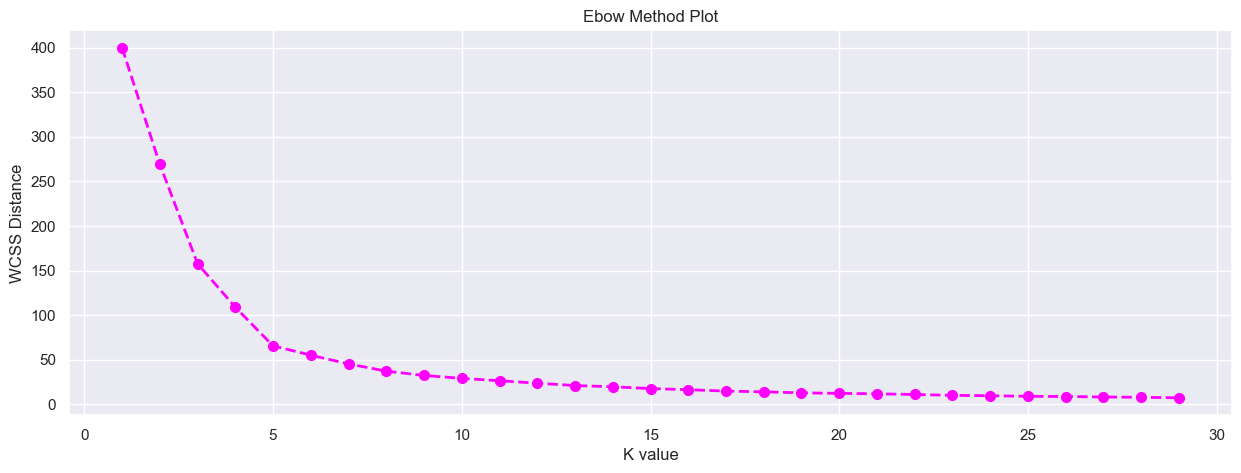

In [20]:
plt.figure(figsize = (15 , 5))
plt.plot(k, wcss, color='magenta', marker='o', linestyle='dashed',linewidth=2, markersize=7)
plt.xlabel('K value')
plt.ylabel('WCSS Distance')
plt.title('Ebow Method Plot')
plt.show()

##### Insights : by visualization , we get k = 5 means we will create five clusters (k = 7 also we can take)

##### Now we can build the Kmeans model means we can create 5 clusters now 

In [21]:
kmeans = KMeans(n_clusters = 5 , random_state = 12)

In [22]:
kmeans

KMeans(n_clusters=5, random_state=12)

In [23]:
kmeans.fit(scaled_x)

KMeans(n_clusters=5, random_state=12)

### Clusters value

##### labels_ is calculating clusters value means it tells which customer belongs which cluster

In [24]:
labels = kmeans.labels_

In [25]:
cluster = pd.DataFrame(labels , columns = ['Cluster'])

In [26]:
cluster.head(2)

,Cluster
0,0
1,4


##### Performance Metrics in cluster 

##### Silhouette Score

In [27]:
from sklearn.metrics import silhouette_samples , silhouette_score

In [28]:
silhouette_score(scaled_x , cluster , random_state = 12)

0.5546571631111091

##### silhouette score more than 40 % means we build  clusters very accurately

###### Final output and build file for it

In [29]:
final_output_mall_cutsomer = pd.concat([df , cluster] , axis = 1)

In [30]:
final_output_mall_cutsomer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


In [31]:
#final_output_mall_scutsomer.to_csv('C:\\Users\\Lenovo\\Desktop\\final_output_mall_cutsomer.csv')

In [32]:
from matplotlib.colors import ListedColormap

In [33]:
colors = ListedColormap(['magenta', 'red', 'black', 'orange', 'grey'])

### Viusalization of clusters

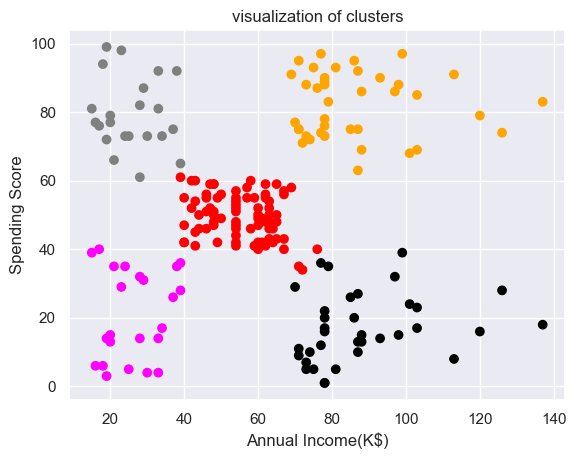

In [34]:
plt.scatter(x.iloc[: , 0] , x.iloc[: , 1] , c = final_output_mall_cutsomer['Cluster'].astype('category') , cmap = colors)
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score')
plt.title('visualization of clusters')
plt.show()

##### Insights : From visualization we get know ,

##### 1.Orange cluster is the best cluster because that clusters customers annual income is high (greater than 60 and spending score is also greater than 60) . so we can provide many facilities to them 
##### 2.Black cluster is our target. beacsue black cluster customers have high annual income but it less spend scores so we can target them for to increase spend score
##### 3.Grey cluster is  also we can target it means it has less annual income but they are frequeqnt use of credit card. so we can increase credit limit of them .
##### 4.Red cluster have less annual income and medium annual income so we can target them for to reach as grey data points
##### 5.magenta cluster has less annual income as well less spent score. so we can target them as to reach to red or grey cluster level 

#### Calculate centriod

In [35]:
centroid = kmeans.cluster_centers_

In [36]:
centroid

array([[-1.30751869, -1.13696536],
       [-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788]])

In [37]:
#centroid = pd.DataFrame(centroid , columns = ['centroid'])

In [38]:
centroid_x_annual_income = centroid[: , 0]
centroid_y_spending_score = centroid[: , 1]

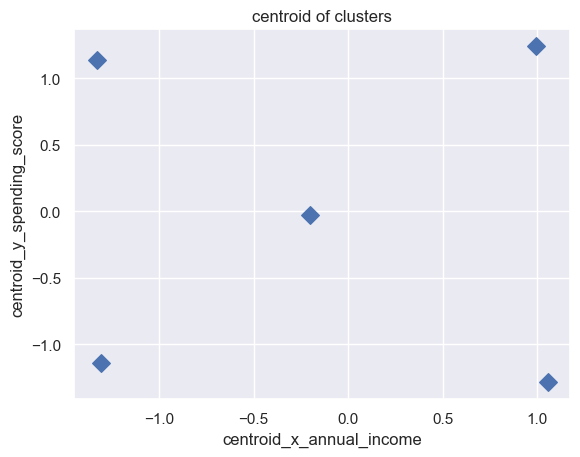

In [39]:
plt.scatter(centroid_x_annual_income , centroid_y_spending_score , s = 80 , marker = 'D')
plt.xlabel('centroid_x_annual_income')
plt.ylabel('centroid_y_spending_score')
plt.title('centroid of clusters')
plt.show()

## Hierachial Cluster

In [40]:
from scipy.cluster.hierarchy import dendrogram , linkage

In [41]:
link_method = linkage(scaled_x)

In [42]:
print(link_method)

[[4.80000000e+01 4.90000000e+01 0.00000000e+00 2.00000000e+00]
 [6.50000000e+01 6.80000000e+01 0.00000000e+00 2.00000000e+00]
 [1.56000000e+02 1.58000000e+02 0.00000000e+00 2.00000000e+00]
 [1.29000000e+02 1.31000000e+02 0.00000000e+00 2.00000000e+00]
 [1.70000000e+02 1.74000000e+02 3.81694292e-02 2.00000000e+00]
 [6.30000000e+01 2.01000000e+02 3.81694292e-02 3.00000000e+00]
 [5.10000000e+01 5.30000000e+01 3.81694292e-02 2.00000000e+00]
 [1.01000000e+02 1.09000000e+02 3.81694292e-02 2.00000000e+00]
 [9.20000000e+01 9.90000000e+01 3.81694292e-02 2.00000000e+00]
 [9.80000000e+01 1.05000000e+02 3.81694292e-02 2.00000000e+00]
 [9.40000000e+01 2.09000000e+02 3.81694292e-02 3.00000000e+00]
 [1.07000000e+02 1.13000000e+02 3.81694292e-02 2.00000000e+00]
 [2.10000000e+01 2.30000000e+01 3.81694292e-02 2.00000000e+00]
 [1.50000000e+02 1.54000000e+02 3.88215607e-02 2.00000000e+00]
 [1.51000000e+02 1.55000000e+02 3.88215607e-02 2.00000000e+00]
 [6.00000000e+01 6.10000000e+01 3.88215607e-02 2.000000

### Draw the hierarchial cluster

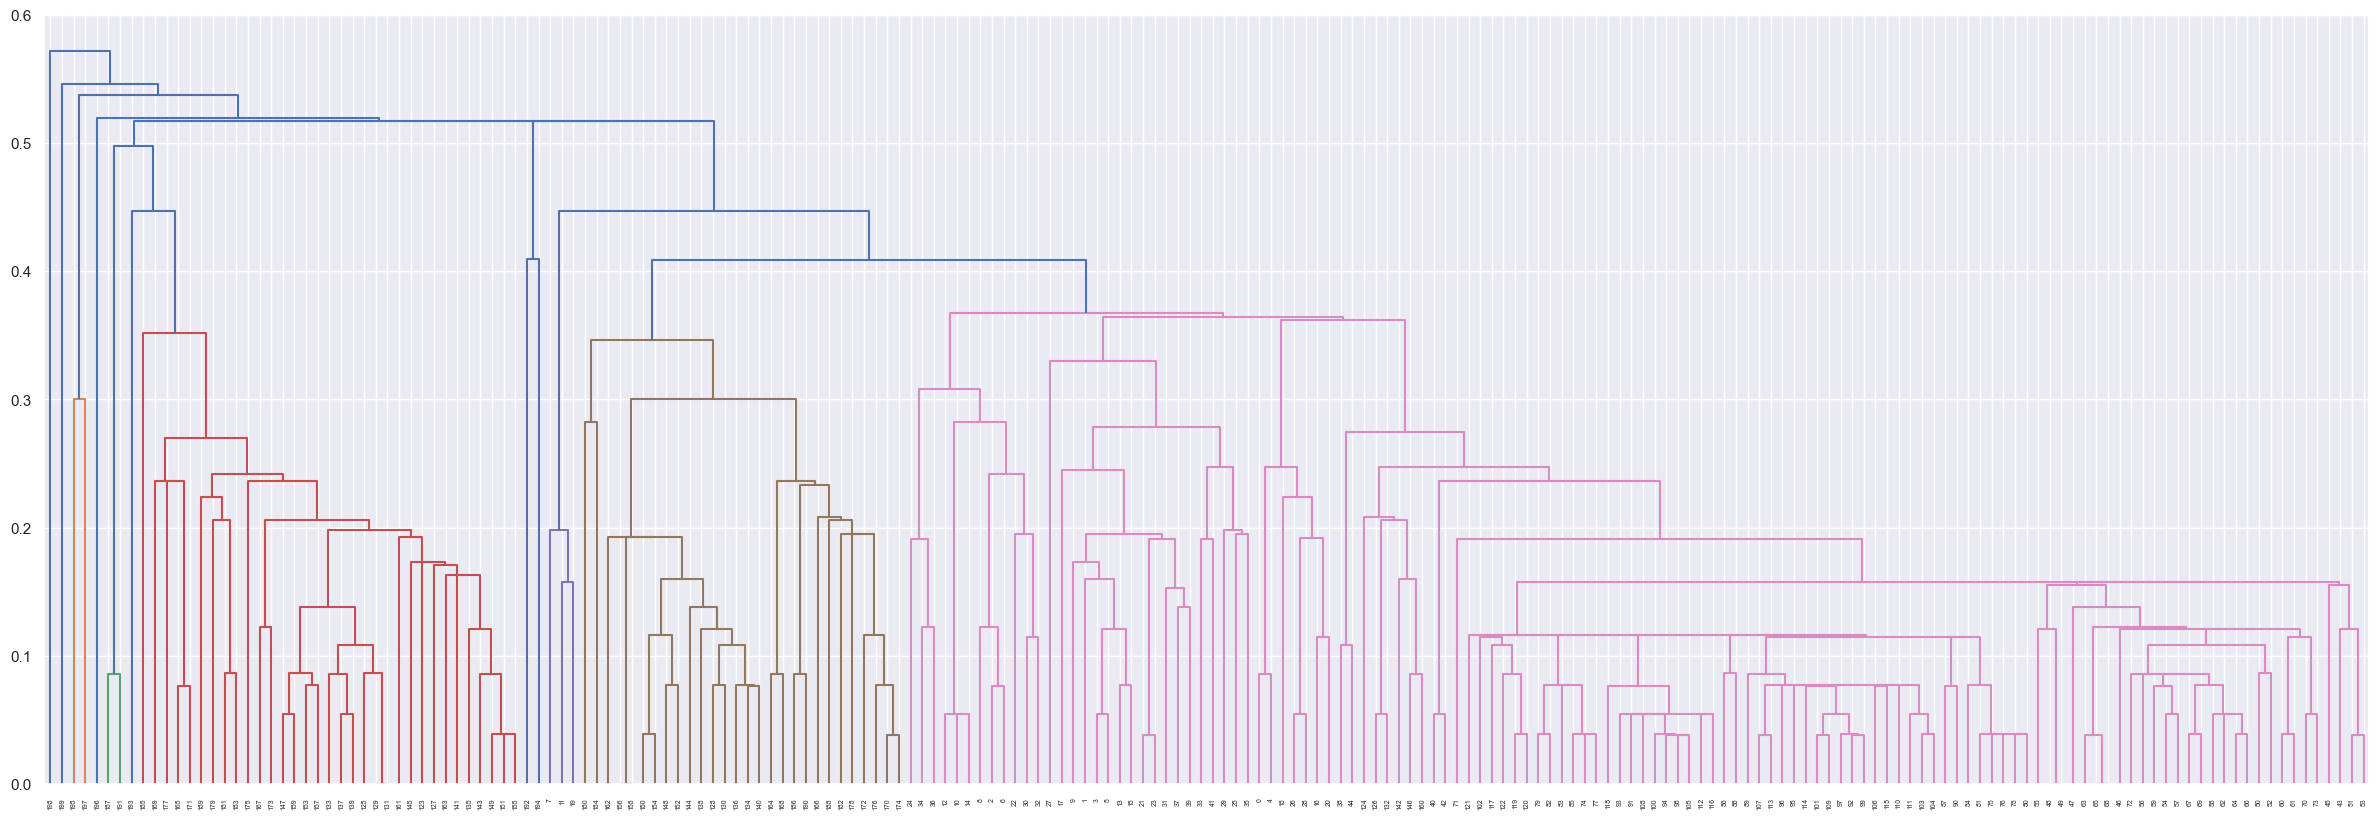

In [43]:
plt.figure(figsize = (30,10))
dend = dendrogram(link_method , p = 1)

### select best five clusters 

In [44]:
from scipy.cluster.hierarchy import fcluster

In [45]:
cluster_hierarchy = fcluster(link_method , 5 ,criterion='maxclust')

In [46]:
print(cluster_hierarchy)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 3 1 5 4]


##### Silhouette score of hierarchical cluster

In [47]:
silhouette_score(scaled_x , cluster_hierarchy)

0.2758004412314313

#### It is very bad clusters

#### Insights : For this dataset we can use only kmeans because kmeans has silhouette score 0.5546571631111091 and silhouette score of hierarchy is 0.2758004412314313. so our silhouette score of kmeans is best 